In [1]:
import netCDF4 as nc
import datetime as dt
import subprocess
import requests
import matplotlib.pyplot as plt
import cmocean
import numpy as np
import os
import glob
import dateutil as dutil
from salishsea_tools import viz_tools, visualisations
%matplotlib inline

In [2]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as fm:
    tmask=np.copy(fm.variables['tmask'])
    umask=np.copy(fm.variables['umask'])
    vmask=np.copy(fm.variables['vmask'])
    navlon=np.copy(fm.variables['nav_lon'])
    navlat=np.copy(fm.variables['nav_lat'])
    dept=np.copy(fm.variables['gdept_1d'])
    e3t_0=np.copy(fm.variables['e3t_0'])
    e3u_0=np.copy(fm.variables['e3u_0'])
    e3v_0=np.copy(fm.variables['e3v_0'])
    e1t=np.copy(fm.variables['e1t'])
    e2t=np.copy(fm.variables['e2t'])
    e1v=np.copy(fm.variables['e1v'])
    e2u=np.copy(fm.variables['e2u'])
    A=fm.variables['e1t'][0,:,:]*fm.variables['e2t'][0,:,:]*tmask[0,0,:,:]

In [3]:
t0=dt.datetime(2015,1,11) # 1st start date of run
#te=dt.datetime(2016,12,1)# last start date of runfnum=18
stm=np.shape(tmask)
SiN=2.0
#nlen=36*2
nlen=36
dlist=[t0+dt.timedelta(days=ii*10) for ii in range(0,nlen)]

In [4]:
#sdir0='/results/SalishSea/nowcast-green/'
#sdir1='/results/SalishSea/hindcast/'
sdir1='/data/eolson/MEOPAR/SS36runs/CedarRuns/spring15spun_Z4/'
#sdir3='/data/eolson/MEOPAR/SS36runs/CedarRuns/spring2015_HCMZ/'

In [5]:
tmaskC=np.copy(tmask)
tmaskC[:,:,370:490,:12]=0
tmaskC[:,:,887:,30:70]=0

## Thalweg plots

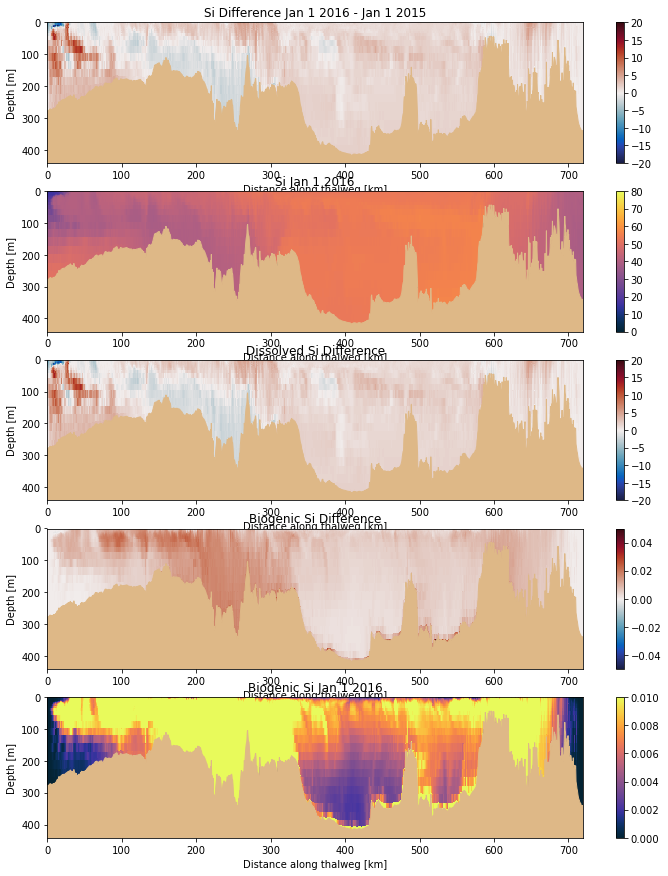

In [7]:

t1=dt.datetime(2015,1,11)
t2=dt.datetime(2016,1,1)
f1=nc.Dataset(sdir1+'SalishSea_1h_20150111_20150311_ptrc_T_20150111-20150120.nc')
f2=nc.Dataset(sdir1+'SalishSea_1h_20151107_20160105_ptrc_T_20151227-20160105.nc')
var=f2.variables['silicon'][-1,:,:,:]+f2.variables['biogenic_silicon'][-1,:,:,:]+SiN*f2.variables['diatoms'][-1,:,:,:]-(
        f1.variables['silicon'][0,:,:,:]+f1.variables['biogenic_silicon'][0,:,:,:]+SiN*f1.variables['diatoms'][0,:,:,:])
fig,ax=plt.subplots(5,1,figsize=(12,15))
fb=nc.Dataset('/data/eolson/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc')
fm=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc')
m=visualisations.contour_thalweg(ax[0],var,fb,fm,method='pcolormesh',cmap=cmocean.cm.balance,mesh_args={'vmin':-20,'vmax':20})
ax[0].set_title('Si Difference Jan 2016 - Jan 2015')

var2=f2.variables['silicon'][-1,:,:,:]+f2.variables['biogenic_silicon'][-1,:,:,:]+SiN*f2.variables['diatoms'][-1,:,:,:]
m=visualisations.contour_thalweg(ax[1],var2,fb,fm,method='pcolormesh',cmap=cmocean.cm.thermal,mesh_args={'vmin':0,'vmax':80})
ax[1].set_title('Si Jan 2016')

var3=f2.variables['silicon'][-1,:,:,:]-f1.variables['silicon'][0,:,:,:]
m=visualisations.contour_thalweg(ax[2],var3,fb,fm,method='pcolormesh',cmap=cmocean.cm.balance,mesh_args={'vmin':-20,'vmax':20})
ax[2].set_title('Dissolved Si Difference')

var4=f2.variables['biogenic_silicon'][-1,:,:,:]-f1.variables['biogenic_silicon'][0,:,:,:]
m=visualisations.contour_thalweg(ax[3],var4,fb,fm,method='pcolormesh',cmap=cmocean.cm.balance,mesh_args={'vmin':-.05,'vmax':.05})
ax[3].set_title('Biogenic Si Difference')

var5=f2.variables['biogenic_silicon'][-1,:,:,:]
m=visualisations.contour_thalweg(ax[4],var5,fb,fm,method='pcolormesh',cmap=cmocean.cm.thermal,mesh_args={'vmin':0,'vmax':.01})
ax[4].set_title('Biogenic Si Jan 2016')

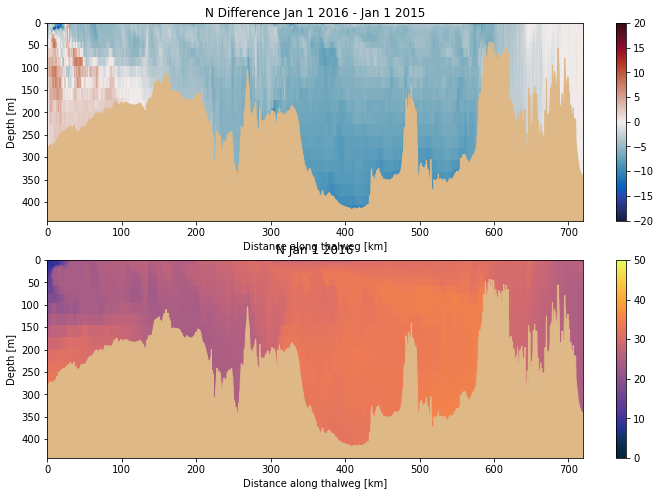

In [8]:
varN=f2.variables['nitrate'][-1,:,:,:]+f2.variables['ammonium'][-1,:,:,:]+f2.variables['particulate_organic_nitrogen'][-1,:,:,:]+\
        f2.variables['dissolved_organic_nitrogen'][-1,:,:,:]+f2.variables['diatoms'][-1,:,:,:]+f2.variables['ciliates'][-1,:,:,:]+f2.variables['microzooplankton'][-1,:,:,:]-(
     f1.variables['nitrate'][0,:,:,:]+f1.variables['ammonium'][0,:,:,:]+f1.variables['particulate_organic_nitrogen'][0,:,:,:]+\
        f1.variables['dissolved_organic_nitrogen'][0,:,:,:]++f1.variables['diatoms'][0,:,:,:]+f1.variables['ciliates'][0,:,:,:]+f1.variables['microzooplankton'][0,:,:,:])
fig,ax=plt.subplots(2,1,figsize=(12,8))
m=visualisations.contour_thalweg(ax[0],varN,fb,fm,method='pcolormesh',cmap=cmocean.cm.balance,mesh_args={'vmin':-20,'vmax':20})
ax[0].set_title('N Difference Jan 1 2016 - Jan 1 2015')

varN2=f2.variables['nitrate'][-1,:,:,:]+f2.variables['ammonium'][-1,:,:,:]+f2.variables['particulate_organic_nitrogen'][-1,:,:,:]+\
        f2.variables['dissolved_organic_nitrogen'][-1,:,:,:]+f2.variables['diatoms'][-1,:,:,:]+f2.variables['ciliates'][-1,:,:,:]+f2.variables['microzooplankton'][-1,:,:,:]
m=visualisations.contour_thalweg(ax[1],varN2,fb,fm,method='pcolormesh',cmap=cmocean.cm.thermal,mesh_args={'vmin':0,'vmax':50})
ax[1].set_title('N Jan 1 2016')